## Simple CNN for Edgelovers
In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a) Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [49]:
def generate_hor_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        y = np.random.randint(1, y_size)
        x1 = np.random.randint(1, x_size - 10)
        x2 = x1 + 10
        image[y, x1:x2] = 255.0
    return image, 1.0

In [50]:
def generate_vert_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        x = np.random.randint(1, y_size)
        y1 = np.random.randint(1, y_size - 10)
        y2 = y1 + 10
        image[y1:y2, x] = 255.0
    return image, 0.0

In [51]:
def data_generation(number, x_size, y_size):
    data = np.zeros(shape=(number, x_size, y_size, 1), dtype=np.uint8)
    labels = np.zeros(shape=(number), dtype=np.int).squeeze()
    for i in range(number):        
            orientation = np.random.randint(0, 2)
            if orientation == 0:
                data[i],labels[i] = generate_hor_img(x_size,y_size, 10)
            else:
                data[i],labels[i] = generate_vert_img(x_size,y_size, 10)
    return data, labels.squeeze()       
        

In [52]:
train_data, train_label = data_generation(1000, 50,50)

In [53]:
val_data, val_label = data_generation(1000, 50,50)

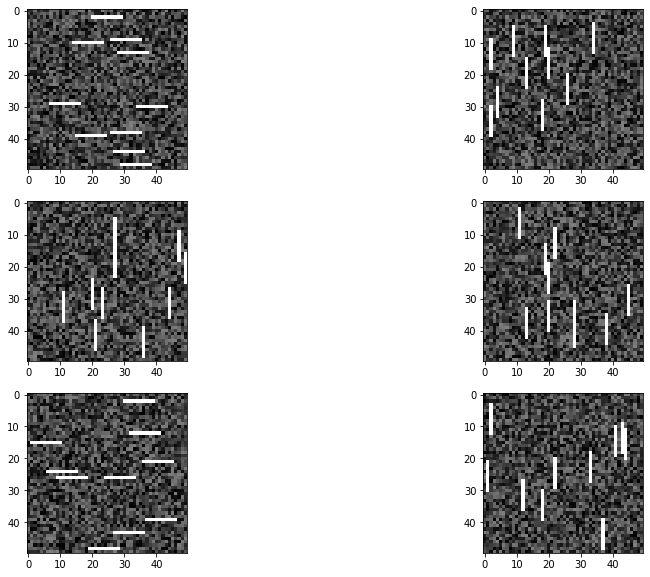

In [54]:
fig=plt.figure(figsize=(15, 10))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = train_data[i, :, :, 0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have at max trainable 32 parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [64]:
epochs = 50
bs = 8

#create model
model = Sequential()
#add model layers
model.add(Conv2D(1, kernel_size=(5,5), activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(46, 46), padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer="adam", loss='categorical_crossentropy', lr=0.1, metrics=['acc'])
#Convert to categorical
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 1)         26        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(train_data, to_categorical(train_label), batch_size=bs, epochs=epochs, validation_data=(val_data, to_categorical(val_label)));

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 2.8922 - acc: 0.4970 - val_loss: 0.7527 - val_acc: 0.5180
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7367 - acc: 0.5130 - val_loss: 0.7020 - val_acc: 0.5220
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7014 - acc: 0.5270 - val_loss: 0.6910 - val_acc: 0.5150
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6894 - acc: 0.5360 - val_loss: 0.6779 - val_acc: 0.5510
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6511 - acc: 0.6370 - val_loss: 0.5733 - val_acc: 0.7550
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5151 - acc: 0.8430 - val_loss: 0.4575 - val_acc: 0.8700
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4108 - acc: 0.9230 - val_loss: 0.3795 - val_acc: 0.9310


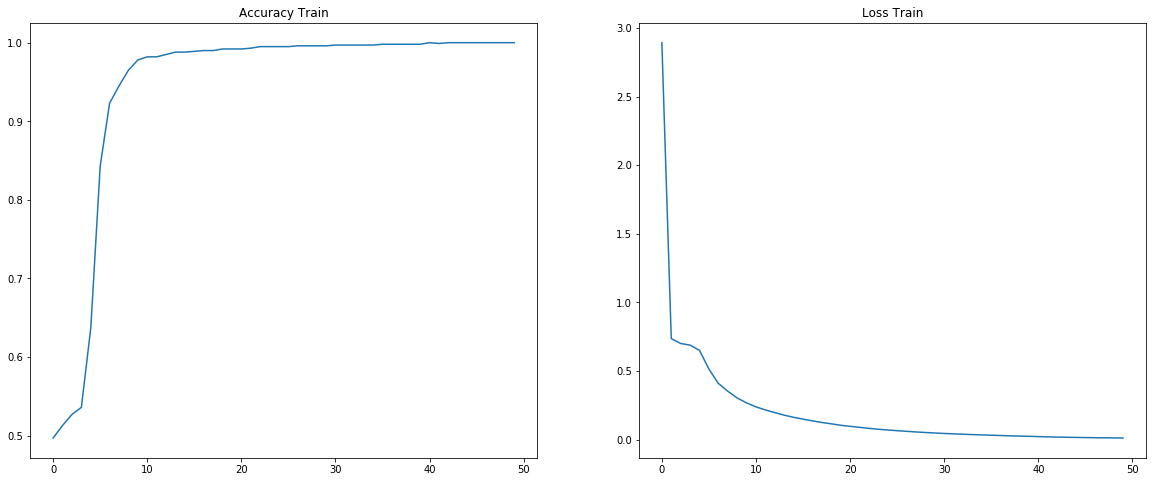

In [66]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Train")
plt.plot(history.history["acc"])
plt.subplot(122)
plt.title("Loss Train")
plt.plot(history.history["loss"])

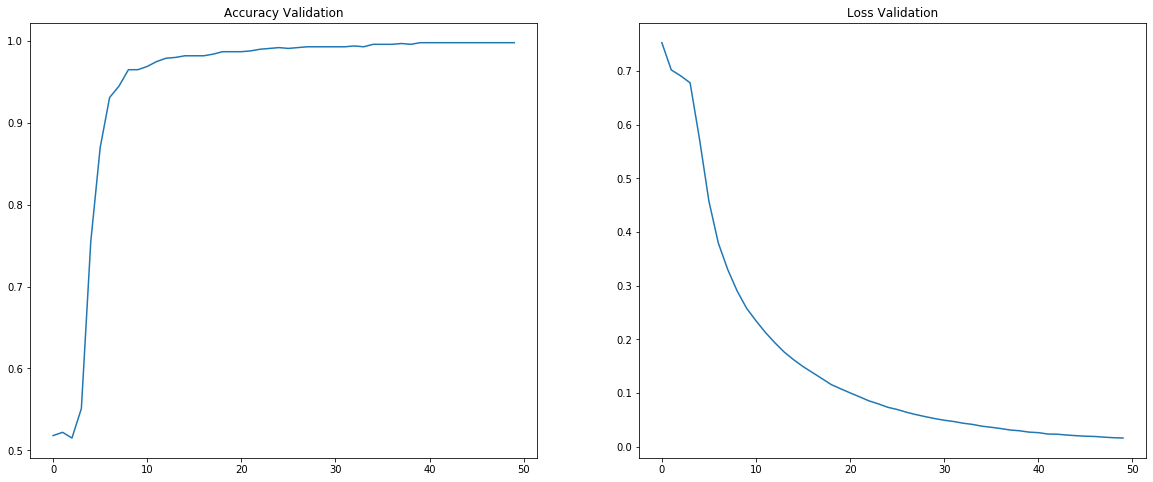

In [67]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Validation")
plt.plot(history.history["val_acc"])
plt.subplot(122)
plt.title("Loss Validation")
plt.plot(history.history["val_loss"])

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?

In [94]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

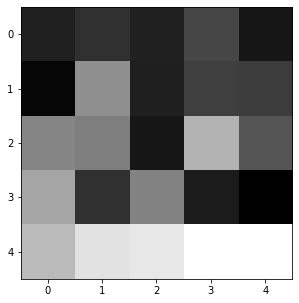

In [96]:
fig=plt.figure(figsize=(5, 5))
f = filters[:, :, 0, 0]
plt.imshow(f, cmap='gray');
